In [9]:
# Importing necessary packages
import torch
from torchvision import datasets, transforms
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

from classes.MED import MED
from classes.MMD import MMD
from classes.KNN import KNN
from classes.ML import ML
from classes.MAP import MAP

### Loading and Pre-processing Data:

In [10]:
# Load the MNIST dataset
transform = transforms.Compose([transforms.ToTensor()])  # Converting image to tensor
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)  # Loading train data
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)  # Loading test data

# Preprocess the data
train_X = train_dataset.data.view(train_dataset.data.size(0), -1).numpy()  # Flattening the images
train_y = train_dataset.targets.numpy()  # Converting tensor to numpy array

test_X = test_dataset.data.view(test_dataset.data.size(0), -1).numpy()  # Flattening the images
test_y = test_dataset.targets.numpy()  # Converting tensor to numpy array


# Masking data to extract only class 3 and 4
class1 = 3
class2 = 4
training_mask = (train_y == class1) | (train_y == class2)  # Mask training data
train_X = train_X[training_mask, :]  # Input data (images)
train_y = train_y[training_mask]  # Labels

test_mask = (test_y == class1) | (test_y == class2)  # Mask test data
test_X = test_X[test_mask, :]  # Input data (images)
test_y = test_y[test_mask]  # Labels


# Applying PCA
pca = PCA(n_components=2)
pca.fit(train_X)
train_X = pca.transform(train_X)
test_X = pca.transform(test_X)

### MED Classifier Example:

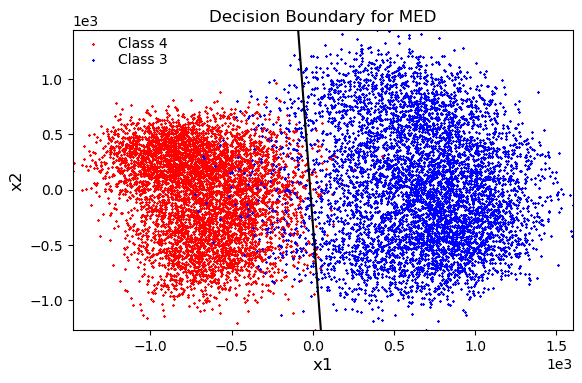

The MED accuracy is: 0.98042


In [3]:
# Instantiating MED object
med_classifier = MED()
med_classifier.fit(train_X, train_y) # Fit Model
med_classifier.plot_decision_boundary_for2D(train_X, train_y) # Plotting decision boundary

y_pred_med = med_classifier.predict(test_X) # Predicting labels for MED
accuracy_med = np.mean(y_pred_med == test_y) # Evaluating accuracy for MED
print("The MED accuracy is: %0.5f" %(accuracy_med))

### MMD Classifier Example:

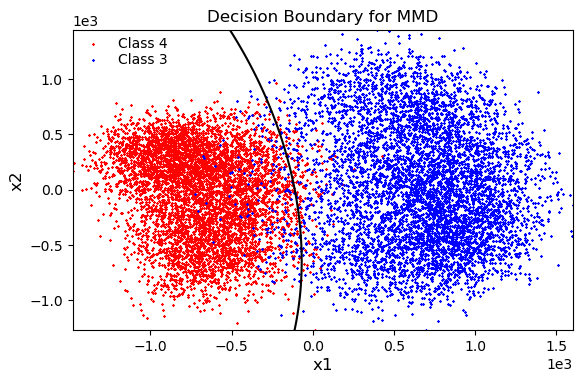

The MMD accuracy is: 0.98143


In [11]:
# Instantiating MMD object
mmd_classifier = MMD()
mmd_classifier.fit(train_X, train_y) # Fit Model
mmd_classifier.plot_decision_boundary_for2D(train_X, train_y) # Plotting decision boundary

y_pred_mmd = mmd_classifier.predict(test_X) # Predicting labels for MMD
accuracy_mmd = np.mean(y_pred_mmd == test_y) # Evaluating accuracy for MMD
print("The MMD accuracy is: %0.5f" %(accuracy_mmd))

### KNN Classifier Example:

In [12]:
# Instantiating KNN object
k = 5
knn_classifier = KNN(k = k, _type="classification")
knn_classifier.fit(train_X, train_y) # Fit Model

y_pred_knn = knn_classifier.predict(test_X) # Predicting labels for KNN
accuracy_knn = np.mean(y_pred_knn == test_y) # Evaluating accuracy for KNN
print("The KNN accuracy with k = %d is: %0.5f" %(k, accuracy_knn))

The KNN accuracy with k = 5 is: 0.97942


### ML Classifier Example:

Here is decision making rule:

Class 1: $-\frac{1}{2}(\mathbf{x} -\mathbf{\mu_1})^T\mathbf{\Sigma_1^{-1}}(\mathbf{x} -\mathbf{\mu_1}) + \frac{1}{2}(\mathbf{x} -\mathbf{\mu_2})^T\mathbf{\Sigma_2^{-1}}(\mathbf{x} -\mathbf{\mu_2}) > \eta$

Class 2: $-\frac{1}{2}(\mathbf{x} -\mathbf{\mu_1})^T\mathbf{\Sigma_1^{-1}}(\mathbf{x} -\mathbf{\mu_1}) + \frac{1}{2}(\mathbf{x} -\mathbf{\mu_2})^T\mathbf{\Sigma_2^{-1}}(\mathbf{x} -\mathbf{\mu_2}) < \eta$

Where

$\eta = \ln{\xi\frac{\det(\mathbf{\Sigma_1})^{\frac{1}{2}}}{\det(\mathbf{\Sigma_2})^{\frac{1}{2}}}}$
in which 
$\begin{cases}
\xi = 1 & \text{for ML} \\
\xi = \frac{p(c_2)}{p(c_1)} & \text{for MAP}
\end{cases}$

In [13]:
# Instantiating ML object
ml_classifier = ML()
ml_classifier.fit(train_X, train_y) # Fit Model

y_ml_predicted = ml_classifier.predict(test_X) # Predicting labels for ML
accuracy_ml = np.mean(y_ml_predicted == test_y) # Evaluating accuracy for ML
print("The ML accuracy is: %0.5f" %(accuracy_ml))

The ML accuracy is: 0.98444


### MAP Classifier Example:

In [14]:
# Instantiating MAP object
map_classifier = MAP(pc1 = 0.58, pc2 = 0.42) # Inputs are prior probabilities of classes
map_classifier.fit(train_X, train_y) # Fit Model

y_map_predicted = map_classifier.predict(test_X) # Predicting labels for MAP
accuracy_map = np.mean(y_map_predicted == test_y) # Evaluating accuracy for MAP
print("The MAP accuracy is: %0.5f" %(accuracy_map))

The MAP accuracy is: 0.98193
